# Ridge Regression

- Polynomial Features
- Mean Squared Error
- Cross Validation
- Ridge Regression
- Regularization
- Bayesian Regression and Tuning the Hyperparameter

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Polynomial Features

In [3]:
mpg = pd.read_csv('data/mtcars.csv')

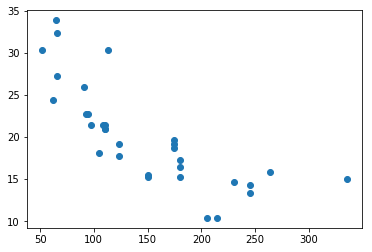

In [4]:
plt.scatter(mpg['hp'], mpg['mpg'])

In [5]:
lr = LinearRegression()
lr.fit(mpg[['hp']], mpg['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

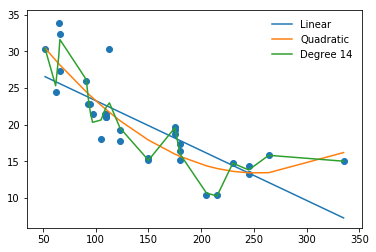

In [6]:
lin = np.polyfit(mpg['hp'], mpg['mpg'], 1)
lin_p = np.poly1d(lin)

x = mpg['hp'].sort_values()
plt.plot(x, lin_p(x), label = 'Linear')

quad = np.polyfit(mpg['hp'], mpg['mpg'], 2)
quad_p = np.poly1d(quad)

plt.plot(x, quad_p(x), label = 'Quadratic')
many = np.polyfit(mpg['hp'], mpg['mpg'], 14)
big_p = np.poly1d(many)

plt.plot(x, big_p(x), label = 'Degree 14')
plt.legend(frameon = False)
plt.scatter(mpg['hp'], mpg['mpg'])

## Polynomial Features 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [8]:
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(mpg[['hp']])[:5]

array([[1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 9.3000e+01, 8.6490e+03],
       [1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 1.7500e+02, 3.0625e+04]])

In [9]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
pipe.fit(mpg[['hp']], mpg['mpg'])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [10]:
from sklearn.metrics import mean_squared_error
pred = pipe.predict(mpg[['hp']])
mean_squared_error(pred, mpg['mpg'])

8.582239421070225

In [11]:
np.sqrt(mean_squared_error(pred, mpg['mpg']))

2.929545941109343

## Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cross_val_score(lr, mpg[['hp']], mpg['mpg'], cv = 5)

array([ 0.08865645,  0.2710069 ,  0.52762015,  0.59050535, -0.64259301])

### Feature Scaling

To use these methods, we want to scale our data.  Many Machine Learning algorithms don't do well with data operating on very different scales.  Using the `MinMaxScaler` normalizes the data and brings the values between 0 and 1. The `StandardScaler` method is less sensitive to wide ranges of values and determines a distribution centered at zero. We will use both on our Ames housing data.  To begin, we need to select the numeric columns from the DataFrame so we can transform them only.

In [14]:
ames = pd.read_csv('data/ames_housing.csv', index_col='Id')
y = ames['SalePrice']
ames = ames.drop('SalePrice', axis = 1)

In [15]:
ames_numeric = ames.select_dtypes(include = 'int64')
ames_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
2,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
3,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
4,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
5,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


### Using the Scaler on a DataFrame

Below, we can compare the results of the two scaling transformations by passing a list of column names to the scaler.  Note the practice of initializing the object, fitting it, and transforming.  

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
std_scaled = StandardScaler()
minmax_scaled = MinMaxScaler()

In [18]:
cols = ames_numeric.columns
std_df = std_scaled.fit_transform(ames[[name for name in cols]])
minmax_df = minmax_scaled.fit_transform(ames[[name for name in cols]])

In [19]:
pd.DataFrame(std_df).head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [20]:
pd.DataFrame(minmax_df).head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,0.140098,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,0.206547,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,0.150573,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,0.123732,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,0.187398,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


### Regularized Methods Comparison

In [21]:
from sklearn.model_selection import train_test_split
crime = pd.read_csv('data/crime_data.csv', index_col = 'Unnamed: 0')

In [22]:
crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


In [23]:
y = crime['ViolentCrimesPerPop']
X = crime.drop('ViolentCrimesPerPop', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
predictions = lm.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = lm.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.3566 
The RMSE value is 526.6057


### Ridge Regression

$$RSS(w, b) = \sum_{i = 1} ^ N (y_i - (wx_i + b))^2 + \alpha \sum_{j = 1}^p w_j^2 $$

Many feature coefficients will be determined with small values.  Larger $\alpha$ means larger penalty, zero is base LinearRegression, and the default for sklearn's implementation is 1.0.

$$y = 3x + 5$$

In [26]:
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_train_scaled, y_train)
rpred = ridge_reg.predict(X_test_scaled)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, rpred))
score = ridge_reg.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.6072 
The RMSE value is 411.4463


In [28]:
ridge_reg = Ridge(alpha = 100)
ridge_reg.fit(X_train_scaled, y_train)
rpred = ridge_reg.predict(X_test_scaled)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, rpred))
score = ridge_reg.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.5479 
The RMSE value is 441.4152


### Searching for Alpha

In [30]:
pipe = make_pipeline(StandardScaler(), Ridge())

In [31]:
params = {'ridge__alpha': [0.1, 1.0, 4.0, 10, 100]}

In [32]:
from sklearn.datasets import load_boston
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [33]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ridge__alpha': [0.1, 1.0, 4.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
br = BayesianRidge()
pipe = make_pipeline(StandardScaler(), br)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('bayesianridge', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False))])

In [37]:
bayes_pred = pipe.predict(X_test)

In [38]:
pipe.score(X_test, y_test)

0.6485282028998123

In [39]:
br.alpha_

7.174765845475963e-06

In [40]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [41]:
from sklearn.dummy import DummyRegressor

In [42]:
dum = DummyRegressor()
dum.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [43]:
lr.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
lr.coef_

array([-3.16915555e-04, -1.10108223e+02, -1.59632515e+00, -3.64619574e+01,
        2.29260460e+01, -1.08149409e+01, -3.54756488e-04,  1.31578170e+00,
       -2.47041922e-02, -1.02009627e+01,  3.39813188e+01, -4.37683836e+00,
        5.67178539e+00,  6.31673334e+00, -1.03068028e+01,  2.11924921e-02,
       -5.26561372e-03, -9.64432008e-04, -4.42684296e+00, -1.49772214e+01,
        6.84920480e+00,  8.59522840e-01, -6.50376202e+00,  9.10458397e+00,
       -2.96589363e+00,  3.17753275e+00,  8.22255788e-01,  2.95177749e+00,
        1.91704429e+02,  4.12159229e+00,  1.34229437e+02, -3.05962540e+02,
       -1.60326761e+02,  8.07927027e+00, -2.85817433e+01,  4.75791572e+00,
       -1.04432098e+00,  1.86133186e+00, -7.98159048e+00, -4.73991845e-03,
        6.59296949e+01,  1.68531355e-03,  3.21680636e+00, -4.82592508e-01,
       -1.56778707e+00,  2.14251802e+00, -4.74383518e+01, -2.54937380e+01,
        5.13721532e+01, -3.89635643e+01, -8.72101689e-01, -1.16431743e+01,
        1.59444146e+01, -

In [45]:
ridge_reg.coef_

array([ 4.29058995e-04,  9.61863567e+00,  6.62005879e-01, -3.38183988e+01,
        1.47591291e+01, -1.40209261e+01, -1.18015305e-03,  1.53150775e+00,
       -1.44331143e-02, -8.11186462e+00,  2.06378978e+01, -3.91468480e+00,
        4.88841205e+00,  6.53339224e+00, -1.00889148e+01,  1.74201841e-02,
       -9.51531176e-03, -6.74019247e-04, -4.09362075e+00, -1.67876872e+01,
        7.31623277e+00, -4.27623139e-01, -3.67531969e+00,  1.00195375e+01,
       -3.47047012e+00,  2.61003959e+00,  2.46480524e+00,  1.12165290e+00,
        3.50818702e+01,  6.09555927e+00, -1.77388766e+01, -1.02448830e+01,
        5.13433718e+00,  8.12627314e+00, -2.65658851e+01,  3.81468060e+00,
       -9.65578681e-01,  1.61984761e+00, -8.48150262e+00, -4.01860098e-03,
        6.19336055e+01,  1.58294164e-03,  2.54042529e+00, -8.40476444e-01,
       -3.65698402e-01,  1.32749814e+00, -2.63633457e+01, -1.42710987e+01,
        4.30648143e+00, -1.05422124e+01, -1.10695577e+00, -1.24931568e+01,
        4.12268206e+00, -

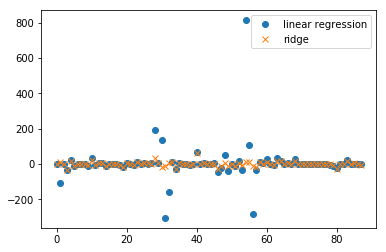

In [46]:
plt.plot(lr.coef_, 'o', label = 'linear regression')
plt.plot(ridge_reg.coef_, 'x', label = 'ridge')
plt.legend()